In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/water_potability - modified.csv')
df.head()

,ph,Solids,Turbidity,Potability
0,NaN,20791.31898,2.963135,0
1,3.716080,18630.05786,4.500656,0
2,8.099124,19909.54173,3.055934,0
3,8.316766,22018.41744,4.628771,0
4,9.092223,17978.98634,4.075075,0


In [ ]:
df.shape

(3276, 4)

In [ ]:
df.isnull().sum()

ph            491
Solids          0
Turbidity       0
Potability      0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ph          2785 non-null   float64
 1   Solids      3276 non-null   float64
 2   Turbidity   3276 non-null   float64
 3   Potability  3276 non-null   int64  
dtypes: float64(3), int64(1)
memory usage: 102.5 KB


In [ ]:
df.describe()

,ph,Solids,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000
mean,7.080795,22014.092526,3.966786,0.390110
std,1.594320,8768.570828,0.780382,0.487849
min,0.000000,320.942611,1.450000,0.000000
25%,6.093092,15666.690300,3.439711,0.000000
50%,7.036752,20927.833605,3.955028,0.000000
75%,8.062066,27332.762125,4.500320,1.000000
max,14.000000,61227.196010,6.739000,1.000000


In [ ]:
df.fillna(df.mean(), inplace=True)
df.isnull().sum()

ph            0
Solids        0
Turbidity     0
Potability    0
dtype: int64

In [ ]:
df.Potability.value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


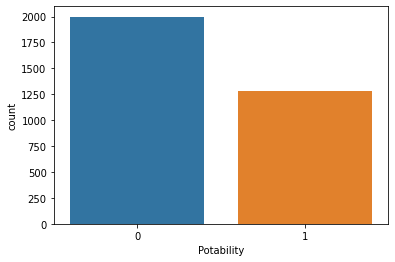

In [ ]:
sns.countplot(df['Potability'])
plt.show()


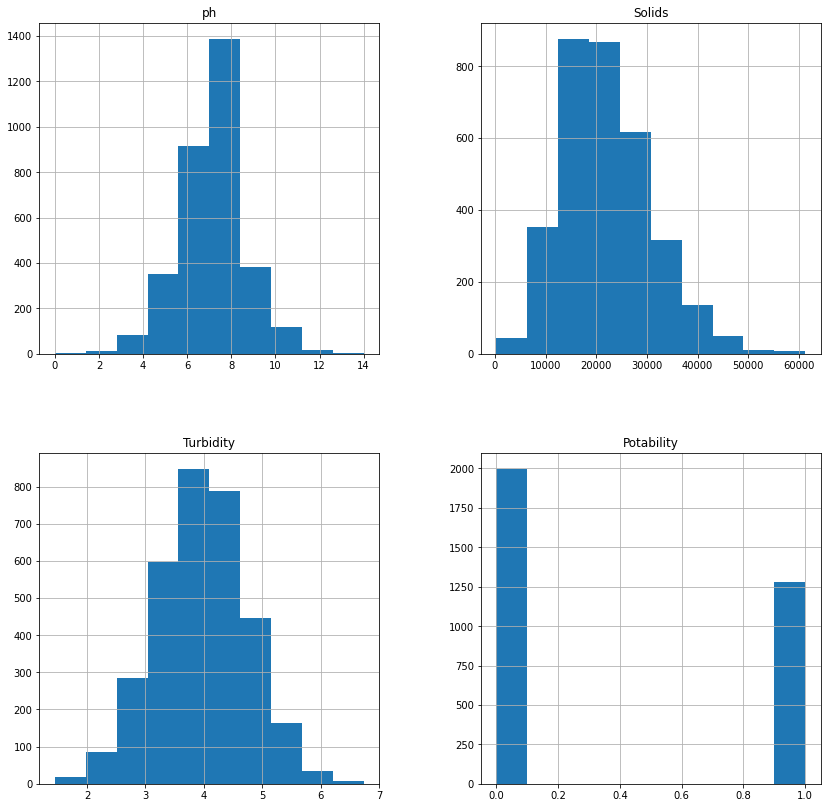

In [ ]:
df.hist(figsize=(14,14))
plt.show()

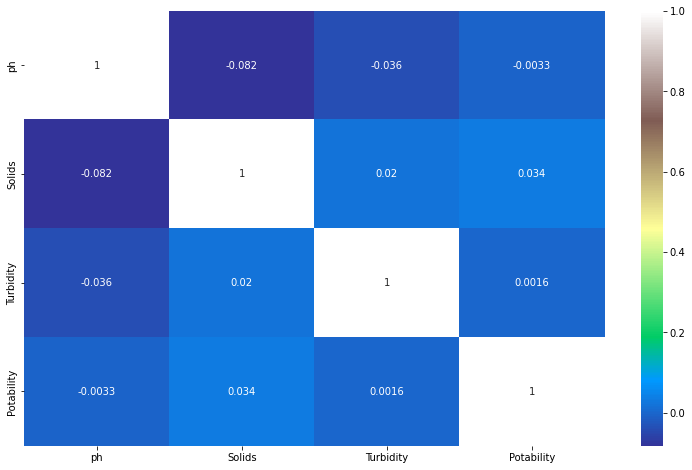

In [ ]:
plt.figure(figsize=(13,8))
sns.heatmap(df.corr(),annot=True,cmap='terrain')
plt.show()

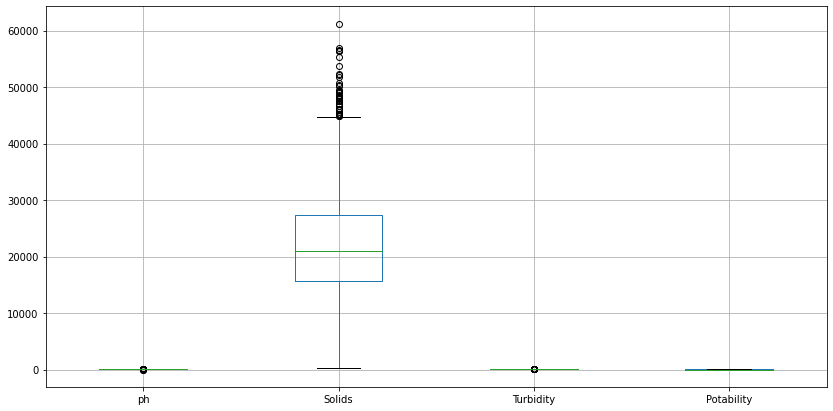

In [ ]:
df.boxplot(figsize=(14,7))

In [ ]:
X = df.drop('Potability',axis=1)
Y= df['Potability']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size= 0.2, random_state=101,shuffle=True)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
dt=DecisionTreeClassifier(criterion= 'gini', min_samples_split= 10, splitter= 'best')
dt.fit(X_train,Y_train)

DecisionTreeClassifier(min_samples_split=10)

In [ ]:
prediction=dt.predict(X_test)
print(f"Accuracy Score = {accuracy_score(Y_test,prediction)*100}")
print(f"Confusion Matrix =\n {confusion_matrix(Y_test,prediction)}")
print(f"Classification Report =\n {classification_report(Y_test,prediction)}")

Accuracy Score = 55.79268292682927
Confusion Matrix =
 [[268 134]
 [156  98]]
Classification Report =
               precision    recall  f1-score   support

           0       0.63      0.67      0.65       402
           1       0.42      0.39      0.40       254

    accuracy                           0.56       656
   macro avg       0.53      0.53      0.53       656
weighted avg       0.55      0.56      0.55       656



In [ ]:
res = dt.predict([[5.735724,25363.016594,4.732954]])[0]
res

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

# define models and parameters
model = DecisionTreeClassifier()
criterion = ["gini", "entropy"]
splitter = ["best", "random"]
min_samples_split = [2,4,6,8,10,12,14]

# define grid search
grid = dict(splitter=splitter, criterion=criterion, min_samples_split=min_samples_split)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search_dt = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv,
                           scoring='accuracy',error_score=0)
grid_search_dt.fit(X_train, Y_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             error_score=0, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_split': [2, 4, 6, 8, 10, 12, 14],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [ ]:
print(f"Best: {grid_search_dt.best_score_:.3f} using {grid_search_dt.best_params_}")
means = grid_search_dt.cv_results_['mean_test_score']
stds = grid_search_dt.cv_results_['std_test_score']
params = grid_search_dt.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print(f"{mean:.3f} ({stdev:.3f}) with: {param}")
print("Training Score:",grid_search_dt.score(X_train, Y_train)*100)
print("Testing Score:", grid_search_dt.score(X_test, Y_test)*100)

Best: 0.556 using {'criterion': 'gini', 'min_samples_split': 14, 'splitter': 'random'}
0.531 (0.025) with: {'criterion': 'gini', 'min_samples_split': 2, 'splitter': 'best'}
0.521 (0.031) with: {'criterion': 'gini', 'min_samples_split': 2, 'splitter': 'random'}
0.536 (0.032) with: {'criterion': 'gini', 'min_samples_split': 4, 'splitter': 'best'}
0.534 (0.031) with: {'criterion': 'gini', 'min_samples_split': 4, 'splitter': 'random'}
0.537 (0.029) with: {'criterion': 'gini', 'min_samples_split': 6, 'splitter': 'best'}
0.540 (0.024) with: {'criterion': 'gini', 'min_samples_split': 6, 'splitter': 'random'}
0.536 (0.033) with: {'criterion': 'gini', 'min_samples_split': 8, 'splitter': 'best'}
0.539 (0.026) with: {'criterion': 'gini', 'min_samples_split': 8, 'splitter': 'random'}
0.539 (0.029) with: {'criterion': 'gini', 'min_samples_split': 10, 'splitter': 'best'}
0.553 (0.027) with: {'criterion': 'gini', 'min_samples_split': 10, 'splitter': 'random'}
0.537 (0.031) with: {'criterion': 'gini',